## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train_dataset.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings   
warnings.filterwarnings("ignore") 

### **나.  학습데이터 불러오기**

In [3]:
data = pd.read_csv('train_dataset.csv', delimiter=',')

In [193]:
data.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


# <b>Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

## <b>Q1. 데이터 단변량 분석하기

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

[  23.   75.   20.   27.   39.   18.   49.   25.   40.   33.  136.   51.
   37.   68.   43.   38.   35.   73.   14.   30.   89.   34.  127.  113.
   65.   67.   31.   77.   26.   97.   15.   19.   24.   53.   17.   36.
   42.   13.   59.  106.   29.   28.  152.  141.   32.   16.  117.  235.
   41.   52.  120.   78.   48.   93.   71.   22.   45.   55.   46.   94.
   54.   21.   81.   11.   85.   72.   99. 1143.  230.  187.   86.   76.
  257.   64.   69.  171.   50.  518.   47.  151.  194.   12.  207.   70.
   62.  103.  217.   98.  334.   63.  880.   82.  157.   80.  122.   56.
  297.   44.  119.  116.   57.   66.  102.  238.  111.  104.  107.  233.
   95.  118.  140.   58.  177.  213.   92.   83.  429.   74.  275.  231.
   84.   79.  362.   88.  208.  159.  133.  267.   90.  166.  168.  174.
  105.  179.  926.   60.  114.  112.  139.  101.  196.  283.  296.   10.
  173. 1302.  126.  155.   61.    9.   96.  110.  243.   91.  952.  142.
  191.  123.   87.  163.  184.  131.  180. 1709.  2

,url_len
count,3664.000000
mean,54.559225
std,82.493265
min,6.000000
25%,24.000000
50%,36.000000
75%,55.000000
max,1837.000000


--------------------------------------------------


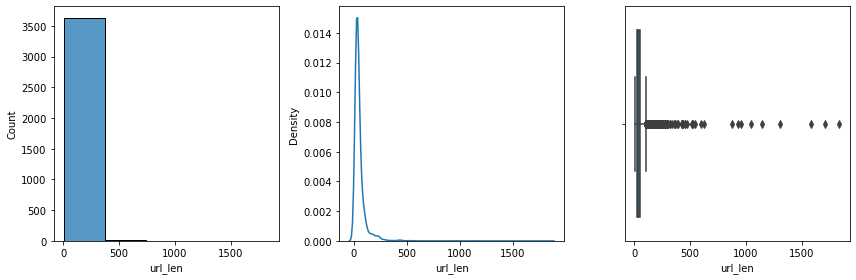

In [101]:
feature='url_len'  # URL 길이
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=5)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

[ 0.  2.  1.  3.  4.  6.  5. 14.]
--------------------------------------------------
0
--------------------------------------------------


,url_num_hyphens_dom
count,3664.000000
mean,0.412937
std,0.847058
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,14.000000


--------------------------------------------------


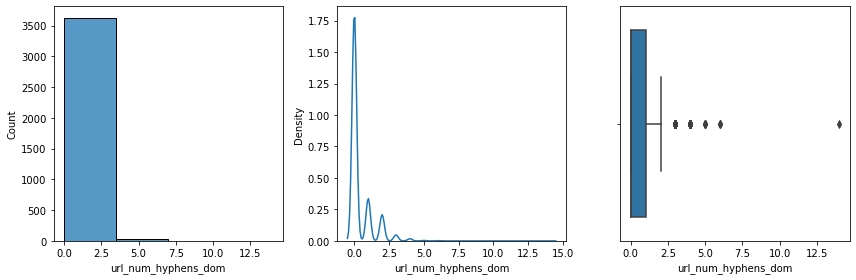

In [102]:
feature= 'url_num_hyphens_dom' # URL내 '-'(하이픈) 개수
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=4)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

[8.000e+00 5.800e+01 4.000e+00 1.300e+01 1.200e+01 0.000e+00 3.000e+01
 2.200e+01 1.000e+00 1.900e+01 2.000e+01 9.100e+01 3.100e+01 2.500e+01
 4.100e+01 2.300e+01 2.800e+01 5.900e+01 1.000e+01 1.110e+02 9.000e+00
 4.400e+01 4.900e+01 4.500e+01 8.600e+01 3.300e+01 2.400e+01 1.100e+01
 3.400e+01 8.300e+01 1.250e+02 2.700e+01 1.260e+02 5.200e+01 1.400e+01
 1.500e+01 1.040e+02 1.780e+02 1.800e+01 3.800e+01 1.700e+01 3.500e+01
 7.000e+01 5.700e+01 1.060e+02 6.400e+01 3.700e+01 6.100e+01 6.000e+00
 6.500e+01 4.300e+01 3.200e+01 5.500e+01 1.127e+03 4.800e+01 6.600e+01
 2.440e+02 5.300e+01 4.000e+01 1.570e+02 7.000e+00 5.070e+02 1.220e+02
 2.600e+01 1.440e+02 5.100e+01 3.900e+01 2.100e+01 2.000e+00 3.600e+01
 2.020e+02 8.400e+01 8.660e+02 1.600e+01 6.200e+01 4.600e+01 4.200e+01
 2.780e+02 1.030e+02 9.600e+01 4.700e+01 5.400e+01 2.260e+02 2.900e+01
 7.200e+01 8.100e+01 5.000e+00 9.400e+01 6.700e+01 7.300e+01 6.900e+01
 4.180e+02 1.020e+02 5.600e+01 2.570e+02 6.800e+01 9.000e+01 3.410e+02
 7.800

,url_path_len
count,3663.000000
mean,29.365820
std,78.595248
min,0.000000
25%,1.000000
50%,13.000000
75%,31.000000
max,1816.000000


--------------------------------------------------


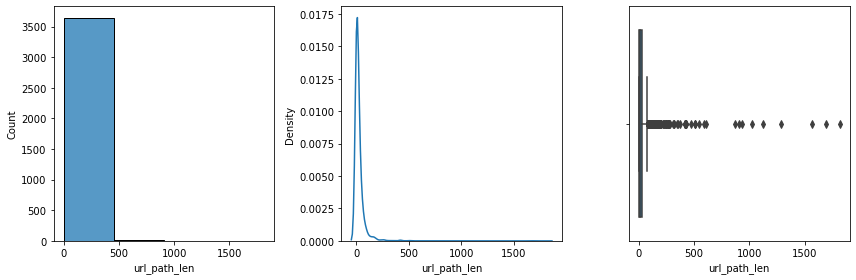

In [73]:
feature= 'url_path_len' # URL의 경로 길이
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=4)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

[ 15.  17.  16.  14.  27.  18.  19.  25.  13.  23.  20.  12.  10.  34.
  24.  32.  22.  30.  28.  11.  26.  42.   9.  21.  33.  43.   8.  31.
  44.   6.  48.   7.  37.   4.  68.  29.  36.  40.  46. 101.  39.  38.
  35.  61.  47.  45.  52.  72.  55.  56.  57. 104.  nan   5.  41.  51.
  74.  60.  49. 109.  85. 100.  54.  62.  53.  77.  63. 103.]
--------------------------------------------------
1
--------------------------------------------------


,url_domain_len
count,3663.000000
mean,20.383292
std,9.597012
min,4.000000
25%,14.000000
50%,17.000000
75%,24.000000
max,109.000000


--------------------------------------------------


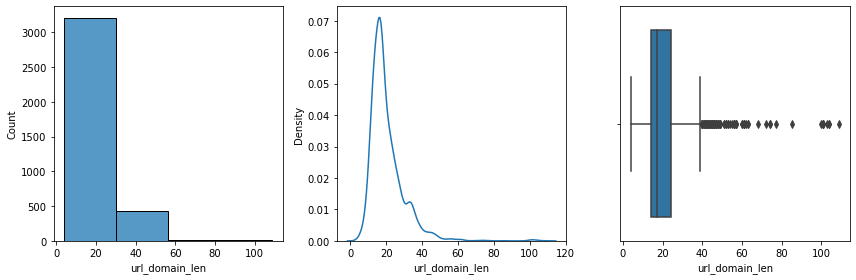

In [76]:
feature= 'url_domain_len' # URL의 도메인 길이
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=4)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

[ 15.  17.  16.  14.  27.  18.  19.  25.  13.  23.  20.  12.  10.  34.
  24.  32.  22.  30.  28.  11.  26.  42.   9.  21.  33.  43.   8.  31.
  44.   6.  48.   7.  37.   4.  68.  29.  36.  40.  46. 101.  39.  38.
  35.  61.  47.  45.  52.  72.  55.  56.  57. 104.   5.  41.  51.  74.
  60.  49. 109.  85. 100.  54.  62.  53.  77.  63. 103.]
--------------------------------------------------
0
--------------------------------------------------


,url_hostname_len
count,3664.000000
mean,20.330513
std,9.628093
min,4.000000
25%,14.000000
50%,17.000000
75%,24.000000
max,109.000000


--------------------------------------------------


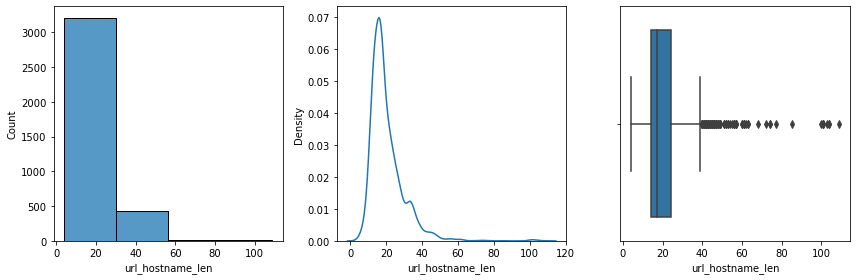

In [77]:
feature= 'url_hostname_len' # URL의 hostname 길이
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=4)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

[ 2.  6.  3.  4.  1.  9.  5. 32. 10.  7.  8. 11. 13. 12. 26. 14. 16.]
--------------------------------------------------
0
--------------------------------------------------


,url_num_dots
count,3664.000000
mean,2.516921
std,1.534119
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,32.000000


--------------------------------------------------


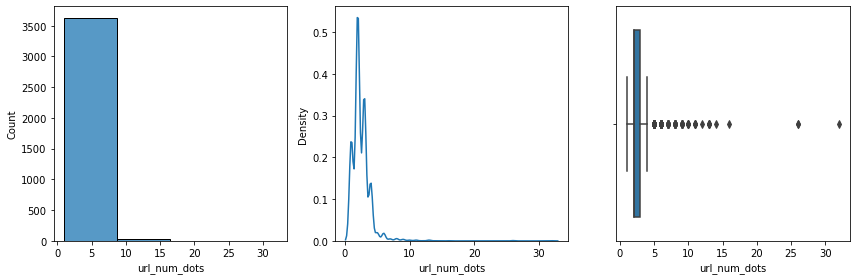

In [78]:
feature= 'url_num_dots' # URL내 '.'(닷) 개수
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=4)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

[ 0.  1.  2.  3. 11. 12.  4. 10.  5.  6. 14. 18. 15.]
--------------------------------------------------
0
--------------------------------------------------


,url_num_underscores
count,3664.000000
mean,0.272653
std,1.124592
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,18.000000


--------------------------------------------------


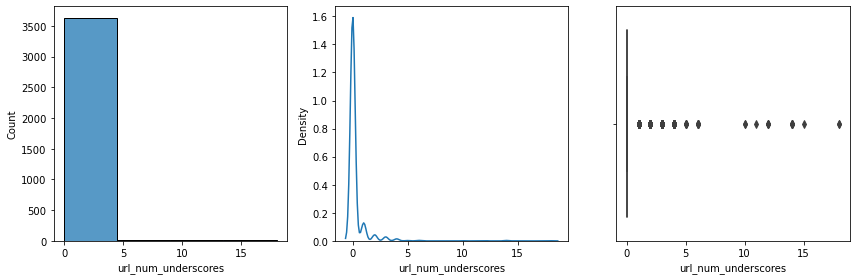

In [79]:
feature= 'url_num_underscores' # URL내 '_'(언더바) 개수
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=4)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

[  0.  21.  41.  36.  45.  71.  11.  27. 157.  62. 124.  48. 132. 289.
  59.  70.  28.  47. 165.  44.  35.  20.  53.  90. 140. 141.  51.   9.
  16. 114.   5.  55. 125.  13.  31.  34. 106. 162. 145.  98.  15. 110.
 144. 200.  37.  52. 271.  49. 122. 312.  42.  85.  18. 146. 350.  82.
 102. 429.   6.  57.  40.  68.  94. 173. 208.  19. 185. 248.  17.  64.
  56.  25.  30.  81. 156. 111. 120.  43.]
--------------------------------------------------
0
--------------------------------------------------


,url_query_len
count,3664.000000
mean,4.707697
std,25.318285
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,429.000000


--------------------------------------------------


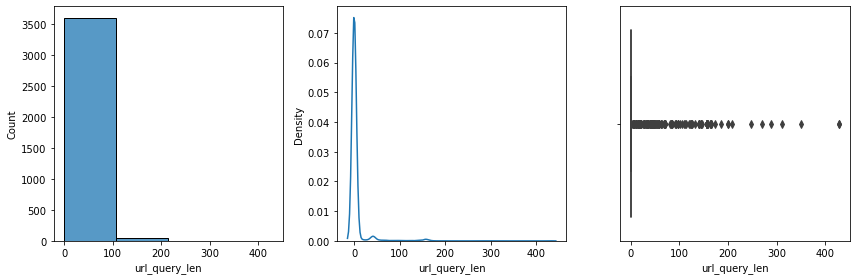

In [80]:
feature= 'url_query_len' # URL쿼리 길이
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=4)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

[0. 1. 2. 3. 6. 7. 4. 9. 8.]
--------------------------------------------------
0
--------------------------------------------------


,url_num_query_para
count,3664.000000
mean,0.104258
std,0.574310
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,9.000000


--------------------------------------------------


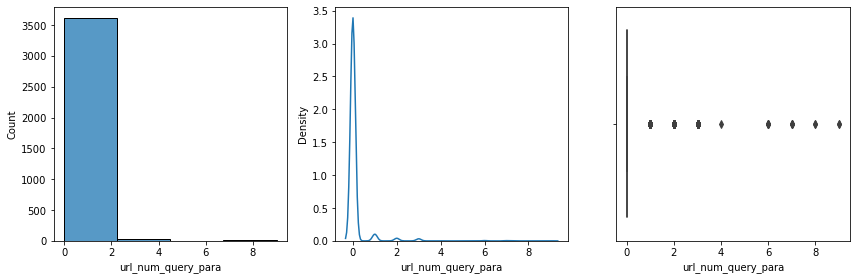

In [81]:
feature= 'url_num_query_para' # URL쿼리의 파라미터 개수
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=4)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

[0. 1.]
--------------------------------------------------
0
--------------------------------------------------


,url_ip_present
count,3664.000000
mean,0.060862
std,0.239110
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


--------------------------------------------------


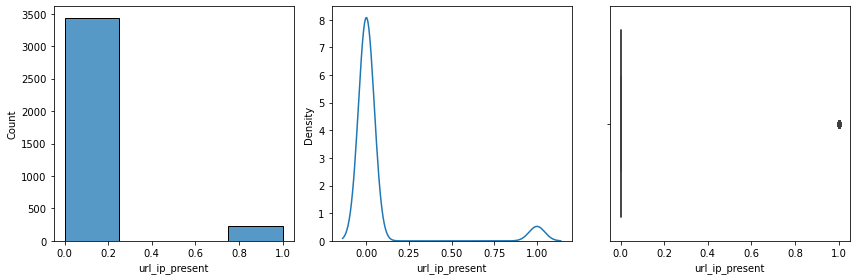

In [82]:
feature= 'url_ip_present' # URL내 IP표시 여부
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=4)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

[4.2603326  4.63610669 3.70896608 ... 4.13535561 4.36233111 3.61947057]
--------------------------------------------------
0
--------------------------------------------------


,url_entropy
count,3664.000000
mean,4.228568
std,0.393055
min,2.737839
25%,3.983196
50%,4.189561
75%,4.458940
max,5.821782


--------------------------------------------------


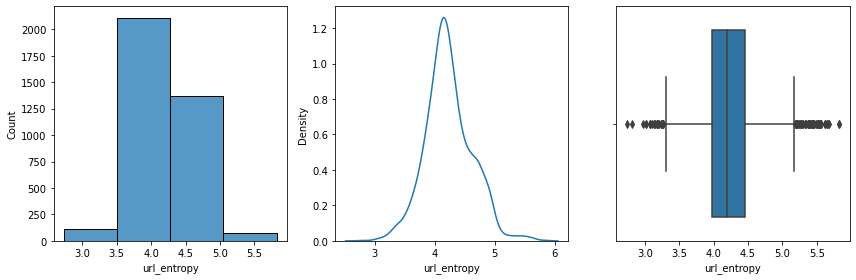

In [83]:
feature= 'url_entropy' # URL 복잡도
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=4)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

[0.]
--------------------------------------------------
0
--------------------------------------------------


,url_chinese_present
count,3664.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


--------------------------------------------------


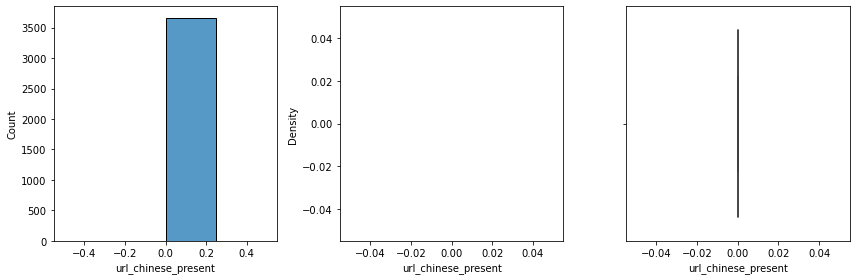

In [84]:
feature= 'url_chinese_present' # URL내 중국어 표기 여부 
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=4)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

[0. 1.]
--------------------------------------------------
0
--------------------------------------------------


,url_port
count,3664.000000
mean,0.002183
std,0.046682
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


--------------------------------------------------


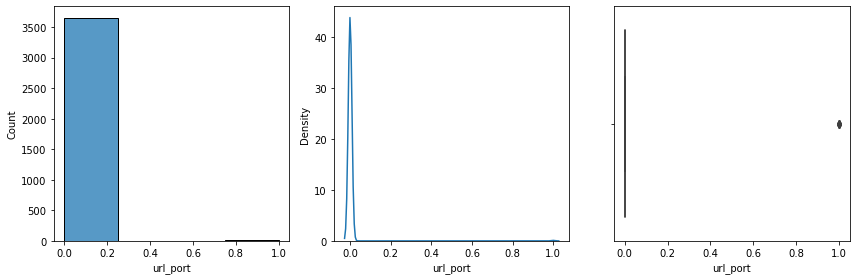

In [85]:
feature= 'url_port' # URL내 포트 표기 여부 
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=4)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

[ 0.  1.  3.  2. 12.  6.  4. 11.  5. 26. 17.  8. 10.  7.]
--------------------------------------------------
0
--------------------------------------------------


,html_num_tags('iframe')
count,3664.000000
mean,0.220797
std,0.898383
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,26.000000


--------------------------------------------------


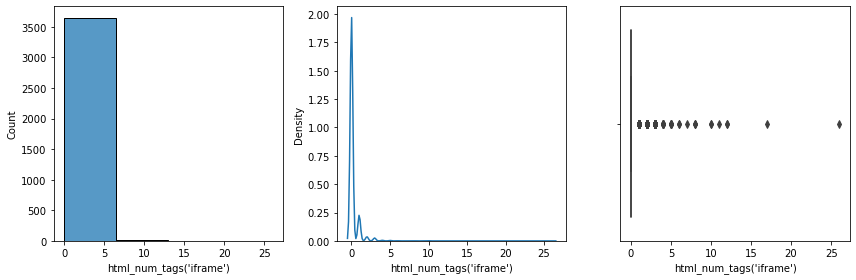

In [103]:
feature= "html_num_tags('iframe')" # HTML내 'iframe' 태그 개수
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=4)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

[  7.  18.  33.  15.  10.   4.   8.  22.  17.   3.  36.  13.   0.   2.
  12.   5.  24.  16.   1.   6.  21.  14.  28.  11.  42.  35.   9.  43.
  25.  27. 104.  23. 108.  19.  53.  31.  46.  26.  37.  78.  29.  77.
  47.  87.  83.  38.  50.  49.  20.  44.  32.  45.  48.  61.  39.  40.
  30.  56.  74.  34.  60.  97. 267.  41.  52. 140.  65.  51.  90.  98.
  70.  54.  69. 129.  59.  82. 174.  63.]
--------------------------------------------------
0
--------------------------------------------------


,html_num_tags('script')
count,3664.000000
mean,8.785480
std,12.647356
min,0.000000
25%,2.000000
50%,4.000000
75%,12.000000
max,267.000000


--------------------------------------------------


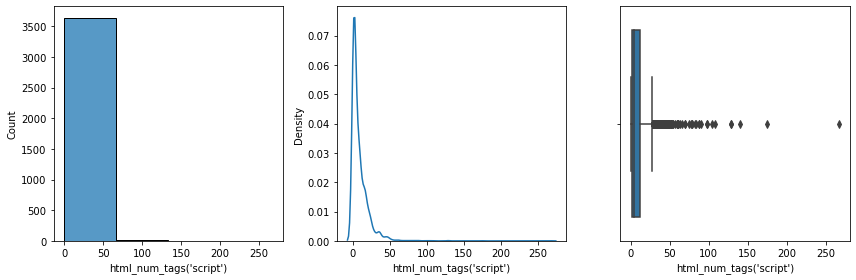

In [104]:
feature= "html_num_tags('script')" # html_num_tags('script')
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=4)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

[0. 1. 3.]
--------------------------------------------------
0
--------------------------------------------------


,html_num_tags('embed')
count,3664.000000
mean,0.018013
std,0.144808
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


--------------------------------------------------


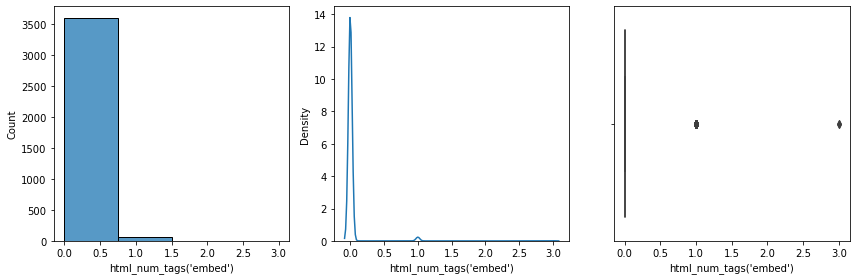

In [106]:
feature= "html_num_tags('embed')" # HTML내 'embed' 태그 개수
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=4)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

[0. 1. 2. 3. 8. 4. 5.]
--------------------------------------------------
0
--------------------------------------------------


,html_num_tags('object')
count,3664.000000
mean,0.028930
std,0.237682
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8.000000


--------------------------------------------------


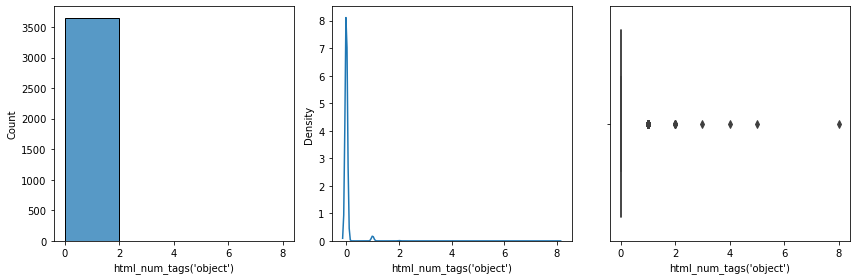

In [100]:
feature= "html_num_tags('object')" # HTML내 'object' 태그 개수
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=4)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

[0.0000e+00 2.0000e+01 1.0100e+02 1.5100e+02 3.3200e+02 3.0000e+00
 1.9000e+01 3.3300e+02 3.2000e+01 1.8000e+01 1.6800e+02 2.5000e+01
 4.7000e+01 3.2500e+02 4.0000e+00 6.0000e+00 5.0000e+01 1.0400e+02
 5.5110e+03 9.0000e+00 7.4000e+01 1.0000e+00 8.8000e+01 4.1000e+01
 2.6700e+02 2.1000e+01 2.0000e+00 1.7000e+01 1.1700e+02 6.2000e+01
 3.1700e+02 4.7400e+02 4.4000e+01 1.8300e+02 2.4900e+02 3.6000e+01
 3.1000e+02 4.5000e+01 5.7000e+01 2.4000e+01 1.4000e+01 9.9000e+01
 3.5000e+01 5.1000e+01 1.9500e+02 1.5800e+02 1.1400e+02 1.1800e+02
 4.6000e+01 1.1000e+01 8.0000e+00 5.9000e+01 8.5000e+01 6.6000e+01
 1.3900e+02 5.0000e+00 3.0300e+02 2.0600e+02 3.0000e+01 2.6100e+02
 5.5000e+01 1.2000e+02 2.6500e+02 2.7000e+01 7.0000e+01 2.0870e+03
 1.2000e+01 6.9000e+01 2.2400e+02 1.0000e+01 6.4000e+01 1.0000e+02
 2.2800e+02 2.1900e+02 3.9000e+01 4.5200e+02 3.3000e+01 1.2100e+02
 4.3000e+01 1.2500e+02 1.4800e+02 3.7000e+01 1.0300e+02 1.5600e+02
 7.0000e+00 2.8000e+01 7.6000e+01 5.4000e+01 2.1400e+02 8.6000

,html_num_tags('div')
count,3664.000000
mean,70.843886
std,365.593304
min,0.000000
25%,6.000000
50%,33.000000
75%,62.000000
max,19941.000000


--------------------------------------------------


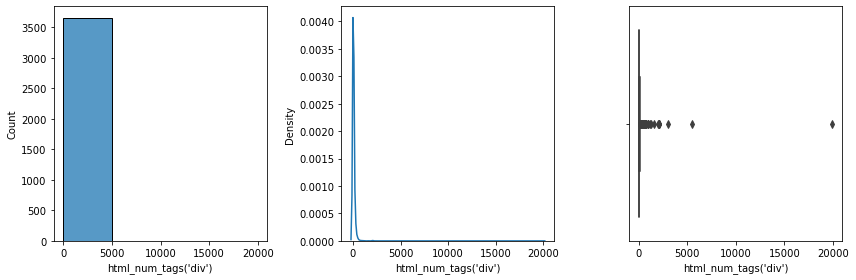

In [107]:
feature= "html_num_tags('div')" # HTML내 'div' 태그 개수
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=4)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

[1. 0. 3. 2.]
--------------------------------------------------
0
--------------------------------------------------


,html_num_tags('head')
count,3664.000000
mean,0.998090
std,0.144974
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


--------------------------------------------------


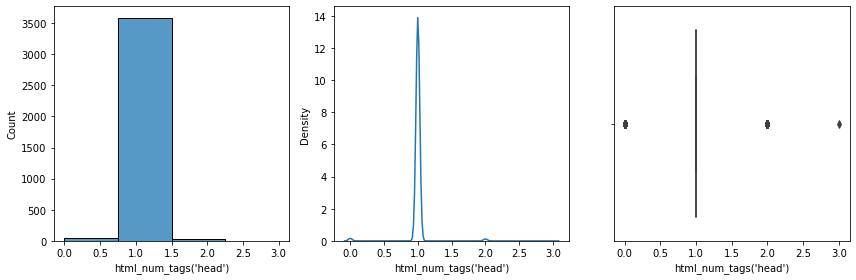

In [194]:
feature= "html_num_tags('head')" # HTML내 'head' 태그 개수
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=4)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

[1. 2. 0. 3.]
--------------------------------------------------
0
--------------------------------------------------


,html_num_tags('body')
count,3664.000000
mean,1.016648
std,0.225330
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


--------------------------------------------------


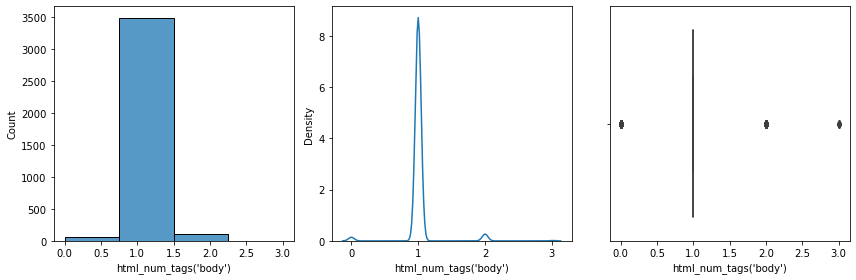

In [108]:
feature= "html_num_tags('body')" # HTML내 'body' 태그 개수
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=4)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

[ 0.  3.  1.  2.  5.  9.  4.  7. 57. 19.  8. 11.  6. 10.]
--------------------------------------------------
0
--------------------------------------------------


,html_num_tags('form')
count,3664.000000
mean,1.028930
std,1.563903
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,57.000000


--------------------------------------------------


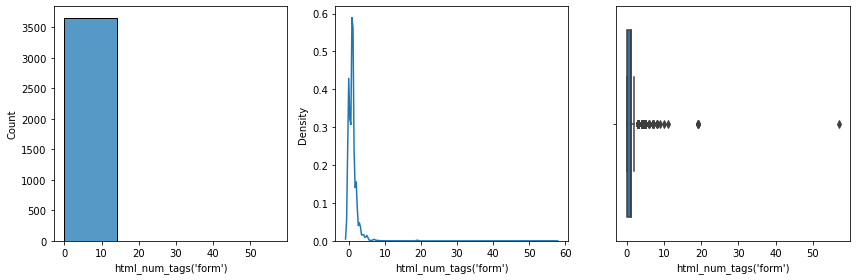

In [109]:
feature= "html_num_tags('form')" # HTML내 'form' 태그 개수
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=4)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

[0.0000e+00 2.1000e+01 7.0000e+01 5.5000e+01 3.2100e+02 1.8000e+01
 4.0000e+00 1.5500e+02 2.9000e+01 2.0000e+00 2.1400e+02 7.3000e+01
 3.1000e+01 7.6000e+01 3.0000e+00 1.0000e+00 8.0000e+00 1.6300e+02
 1.3298e+04 1.1100e+02 2.6000e+01 1.6000e+01 2.4000e+01 1.2000e+01
 1.2300e+02 1.1400e+02 5.6600e+02 4.0000e+01 5.6000e+02 1.6200e+02
 1.5000e+01 5.4000e+01 9.3000e+01 5.0000e+00 8.0000e+01 6.5000e+01
 1.1000e+01 1.0200e+02 4.0300e+02 1.8100e+02 2.7000e+01 3.4000e+01
 1.7000e+01 1.1900e+02 4.4000e+01 5.8000e+01 1.7900e+02 7.0000e+00
 1.1700e+02 1.9200e+02 1.2200e+02 2.0000e+01 5.6400e+02 2.0100e+02
 1.2000e+02 1.2900e+02 4.9000e+01 8.7000e+01 1.9000e+01 1.3000e+01
 1.3150e+03 1.0100e+02 6.0000e+01 6.0000e+00 7.5000e+01 3.4400e+02
 3.7500e+02 4.8000e+01 1.1000e+02 9.2000e+01 2.2000e+01 3.9000e+01
 7.7000e+01 1.8600e+02 2.1600e+02 3.5200e+02 3.9000e+02 9.0000e+00
 1.4400e+02 3.9500e+02 3.8600e+02 5.7000e+01 1.4700e+02 2.1300e+02
 1.6100e+02 1.6400e+02 6.1800e+02 5.0000e+01 2.5000e+01 3.0000

,html_num_tags('a')
count,3664.000000
mean,66.182860
std,342.651459
min,0.000000
25%,2.000000
50%,16.000000
75%,52.000000
max,13451.000000


--------------------------------------------------


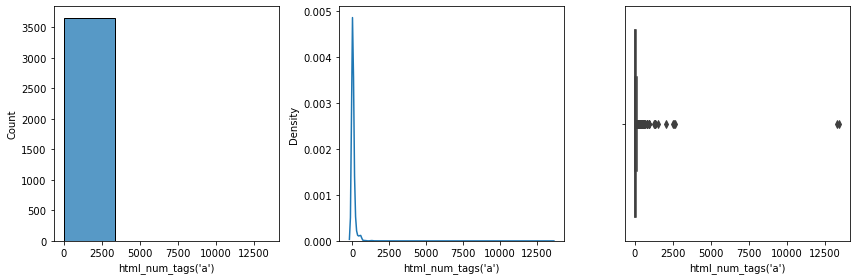

In [110]:
feature= "html_num_tags('a')" # HTML내 'a' 태그 개수
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=4)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

[0.]
--------------------------------------------------
0
--------------------------------------------------


,html_num_tags('applet')
count,3664.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


--------------------------------------------------


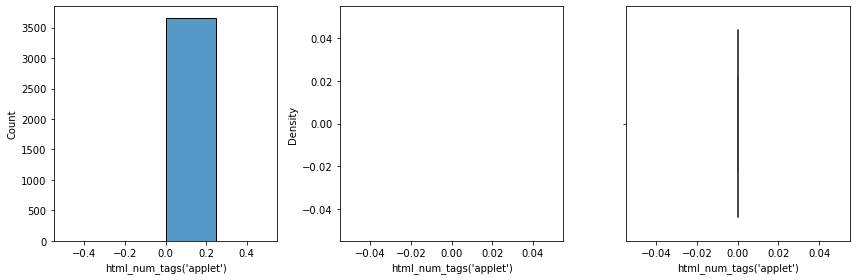

In [111]:
feature= "html_num_tags('applet')" # HTML내 'applet' 태그 개수
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
display(data[[feature]].describe())
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data[feature], bins=4)

plt.subplot(1,3,2)
sns.kdeplot(data[feature])

plt.subplot(1,3,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

['malicious' 'benign']
--------------------------------------------------
0
--------------------------------------------------


benign       0.507096
malicious    0.492904
Name: Result_v1, dtype: float64

--------------------------------------------------


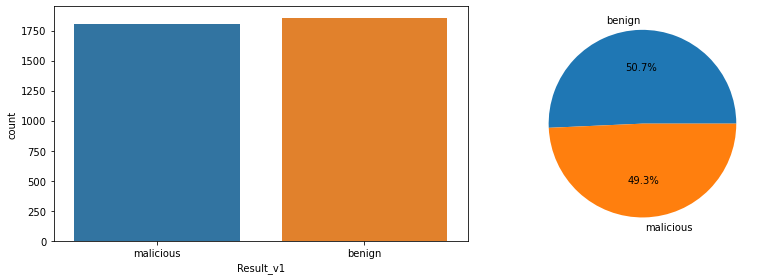

In [96]:
feature= 'Result_v1' # 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )
print(data[feature].unique())
print('-'*50)
print(data[feature].isnull().sum())
print('-'*50)
temp = data[feature].value_counts()
display(temp/data.shape[0])
print('-'*50)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data[feature])

plt.subplot(1,2,2)
plt.pie(temp.values, labels=temp.index, autopct='%.1f%%')


plt.tight_layout()
plt.show()

## <b>Q2. 데이터 이변량 분석하기

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [6]:
import statsmodels.api as sm
import random as rd

In [5]:
target = 'Result_v1'

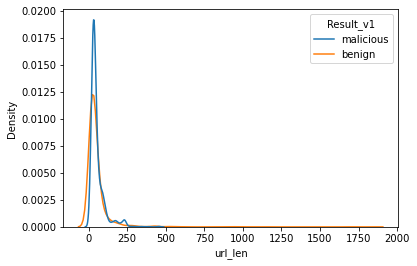

In [197]:
sns.kdeplot(data=data, x='url_len', hue=target, common_norm=False)
plt.show()

In [9]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(data['url_len'], data['Result_v1'])
result = model.fit()
print(result.pvalues)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

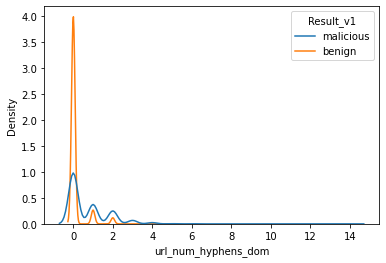

In [198]:
sns.kdeplot(data=data, x='url_num_hyphens_dom', hue=target, common_norm=False)
plt.show()

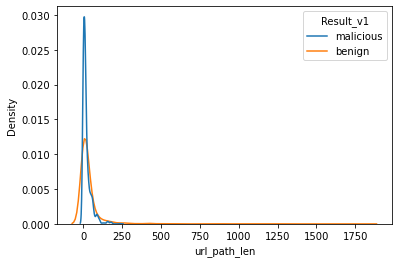

In [199]:
sns.kdeplot(data=data, x='url_path_len', hue=target, common_norm=False)
plt.show()

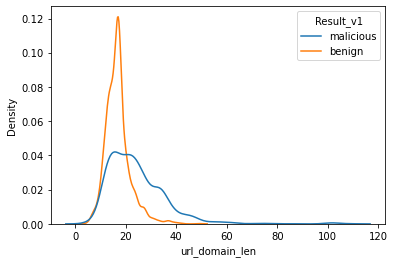

In [7]:
sns.kdeplot(data=data, x='url_domain_len', hue=target, common_norm=False)
plt.show()

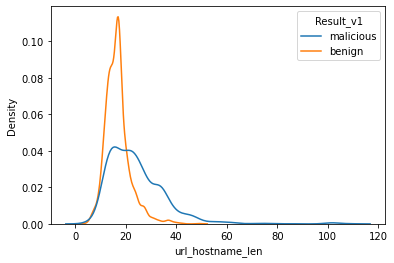

In [15]:
sns.kdeplot(data=data, x='url_hostname_len', hue=target, common_norm=False)
plt.show()

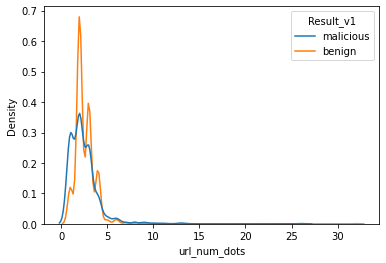

In [202]:
sns.kdeplot(data=data, x='url_num_dots', hue=target, common_norm=False)
plt.show()

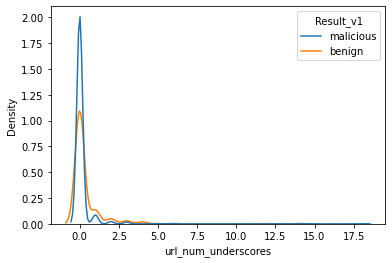

In [203]:
sns.kdeplot(data=data, x='url_num_underscores', hue=target, common_norm=False)
plt.show()

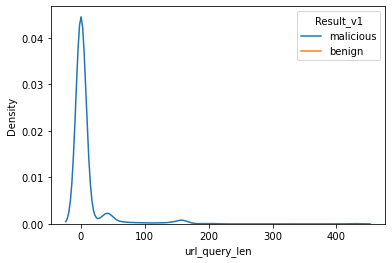

In [204]:
sns.kdeplot(data=data, x='url_query_len', hue=target, common_norm=False)
plt.show()

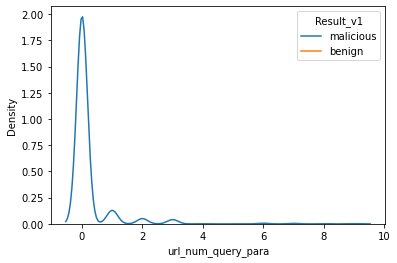

In [205]:
sns.kdeplot(data=data, x='url_num_query_para', hue=target, common_norm=False)
plt.show()

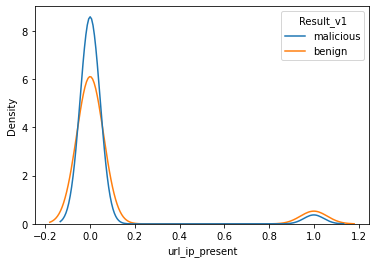

In [206]:
sns.kdeplot(data=data, x='url_ip_present', hue=target, common_norm=False)
plt.show()

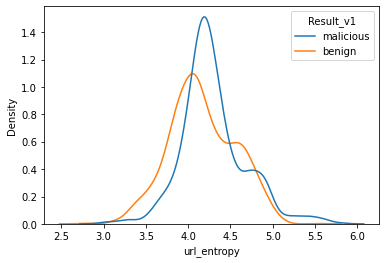

In [207]:
sns.kdeplot(data=data, x='url_entropy', hue=target, common_norm=False)
plt.show()

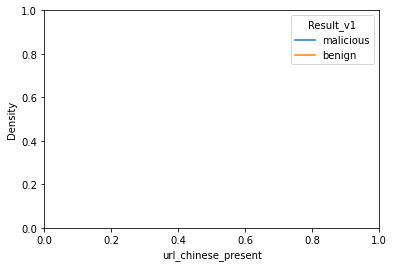

In [208]:
sns.kdeplot(data=data, x='url_chinese_present', hue=target, common_norm=False)
plt.show()

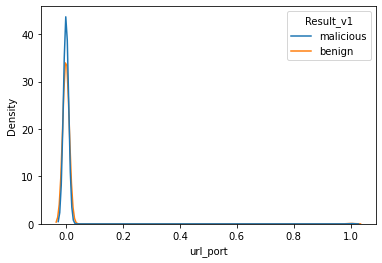

In [209]:
sns.kdeplot(data=data, x='url_port', hue=target, common_norm=False)
plt.show()

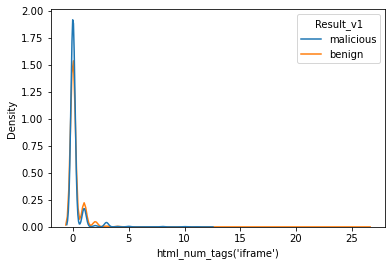

In [210]:
sns.kdeplot(data=data, x="html_num_tags('iframe')", hue=target, common_norm=False)
plt.show()

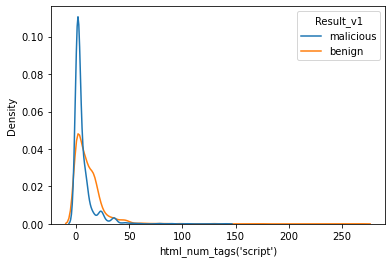

In [211]:
sns.kdeplot(data=data, x="html_num_tags('script')", hue=target, common_norm=False)
plt.show()

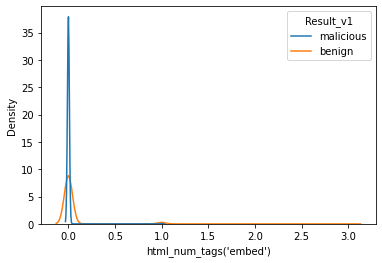

In [212]:
sns.kdeplot(data=data, x="html_num_tags('embed')", hue=target, common_norm=False)
plt.show()

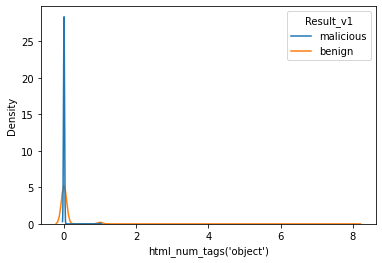

In [213]:
sns.kdeplot(data=data, x="html_num_tags('object')", hue=target, common_norm=False)
plt.show()

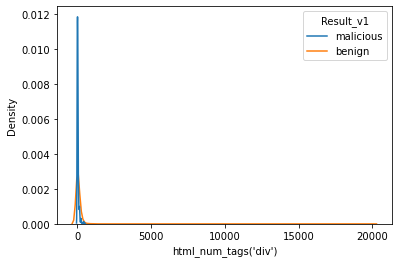

In [214]:
sns.kdeplot(data=data, x="html_num_tags('div')", hue=target, common_norm=False)
plt.show()

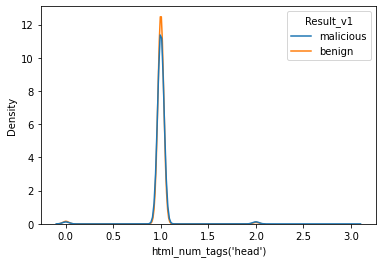

In [216]:
sns.kdeplot(data=data, x="html_num_tags('head')", hue=target, common_norm=False)
plt.show()

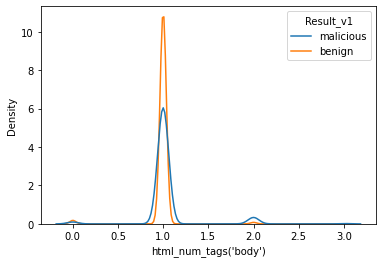

In [217]:
sns.kdeplot(data=data, x="html_num_tags('body')", hue=target, common_norm=False)
plt.show()

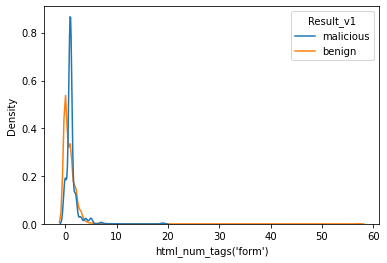

In [218]:
sns.kdeplot(data=data, x="html_num_tags('form')", hue=target, common_norm=False)
plt.show()

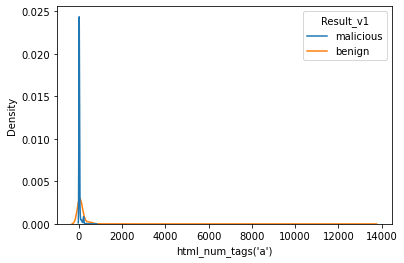

In [219]:
sns.kdeplot(data=data, x="html_num_tags('a')", hue=target, common_norm=False)
plt.show()

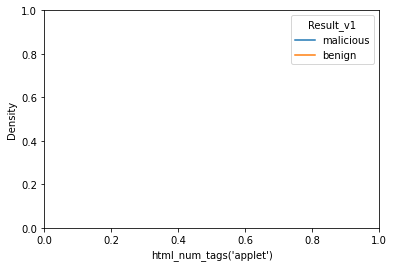

In [220]:
sns.kdeplot(data=data, x="html_num_tags('applet')", hue=target, common_norm=False)
plt.show()

# <b>Step 2. 데이터 전처리
---

## <b>Q3. 중복 데이터 제거
### 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
### 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
### 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
### 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

### <span style="color:darkred">[문제1] df info()를 통해 데이터를 확인하고 중복된 데이터는 삭제해주세요. 삭제 후 info()를 통해 이전 데이터와 비교해 보세요.<span>

In [221]:
# 데이터 프레임의 info를 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3664 non-null   int64  
 1   url_len                  3664 non-null   float64
 2   url_num_hyphens_dom      3664 non-null   float64
 3   url_path_len             3663 non-null   float64
 4   url_domain_len           3663 non-null   float64
 5   url_hostname_len         3664 non-null   float64
 6   url_num_dots             3664 non-null   float64
 7   url_num_underscores      3664 non-null   float64
 8   url_query_len            3664 non-null   float64
 9   url_num_query_para       3664 non-null   float64
 10  url_ip_present           3664 non-null   float64
 11  url_entropy              3664 non-null   float64
 12  url_chinese_present      3664 non-null   float64
 13  url_port                 3664 non-null   float64
 14  html_num_tags('iframe') 

In [16]:
# 중복 데이터 제거를 제거합니다.
x_list =['url_query_len',
'url_num_query_para',
'url_chinese_present', 
"html_num_tags('iframe')",
"html_num_tags('object')",
"html_num_tags('div')",
"url_port",
"html_num_tags('head')",
"html_num_tags('applet')"]
df = data.drop(x_list,axis=1)

In [228]:
# 데이터 프레임의 info를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3664 non-null   int64  
 1   url_len                  3664 non-null   float64
 2   url_num_hyphens_dom      3664 non-null   float64
 3   url_path_len             3663 non-null   float64
 4   url_domain_len           3663 non-null   float64
 5   url_hostname_len         3664 non-null   float64
 6   url_num_dots             3664 non-null   float64
 7   url_num_underscores      3664 non-null   float64
 8   url_ip_present           3664 non-null   float64
 9   url_entropy              3664 non-null   float64
 10  html_num_tags('script')  3664 non-null   float64
 11  html_num_tags('embed')   3664 non-null   float64
 12  html_num_tags('body')    3664 non-null   float64
 13  html_num_tags('form')    3664 non-null   float64
 14  html_num_tags('a')      

---

## <b>Q4. 텍스트와 범주형 특성 처리

### 기계가 데이터를 인식할 수 있도록 텍스트 데이터를 수치형 데이터로 변경합니다.
 - replace() 함수를 이용한 텍스트와 범주형 특성 처리

**<span style="color:green">[참고링크] 공식 Document**</span>

* replace(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
* unique(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

### <span style="color:blue">[예시] df_ex 데이터 프레임에서 replace 함수를 활용 'CA'는'California'로 'NY'는 'NewYork'으로 변경합니다.<span>

In [1]:
import pandas as pd

df_ex = pd.DataFrame({'name': ['Alice','Bob','Charlie','Dave','Ellen','Frank'],
                   'age': [24,42,18,68,24,30],
                   'state': ['NY','CA','CA','TX','CA','NY'],
                   'point': [64,24,70,70,88,57]}
                  )

print(df_ex)

      name  age state  point
0    Alice   24    NY     64
1      Bob   42    CA     24
2  Charlie   18    CA     70
3     Dave   68    TX     70
4    Ellen   24    CA     88
5    Frank   30    NY     57


### <span style="color:darkred">[문제2] replace() 함수를 활용 'benign'은 1로 'malicious'은 -1로 변경해주세요. 삭제 후 df['Result_v1'] 전후 데이터를 비교해 보세요.<span>

In [234]:
# 텍스트 데이터를 수치형 데이터로 변경 전 unique() 함수를 통해 유일한 값 확인

df['Result_v1'].unique()

array(['malicious', 'benign'], dtype=object)

In [236]:
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.

df['Result_v1'] = df['Result_v1'].replace({'benign': 1, 'malicious':-1})

df['Result_v1'].head()

0   -1
1    1
2    1
3    1
4    1
Name: Result_v1, dtype: int64

In [237]:
# 텍스트 데이터를 수치형 데이터로 후 unique() 함수를 통해 유일한 값 확인


df['Result_v1'].unique()

array([-1,  1], dtype=int64)

---

## <b>Q5. 결측치 처리

### 데이터 수집 과정에서 발생한 오류 등으로 인해 결측치가 포함된 경우가 많습니다.
### 모델링 전에 결측치를 확인하고 이를 정제하는 과정은 필요합니다.

### <span style="color:darkred">[문제3] 결측치의 존재를 확인하고 결측치가 포함된 데이터를 처리해보세요.<span>

In [233]:
# 결축치의 존재를 확인합니다.

df.isna().sum()

Unnamed: 0                 0
url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_ip_present             0
url_entropy                0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
Result_v1                  0
dtype: int64

In [238]:
# 결측치를 적절히 처리해줍니다.
df['url_path_len'] = df['url_path_len'].fillna(df['url_path_len'].mean())
df['url_domain_len'] = df['url_domain_len'].fillna(df['url_domain_len'].mean())

In [239]:
# 결축치의 존재를 확인합니다.

df.isna().sum()

Unnamed: 0                 0
url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_ip_present             0
url_entropy                0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
Result_v1                  0
dtype: int64

---

## <b>Q6. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

### AI모델의 성능 향상을 위해 기존의 변수를 조합해 새로운 변수를 만들어 내기도 하고
### 데이터 분석을 통해 필요없는 변수는 삭제하는 과정이 필요 합니다.

### <span style="color:darkred">[문제4] 상관관계 함수 및 데이터 시각화 등을 활용하며 데이터셋을 분석하고 컬럼을 추가/삭제 해보세요.<span>

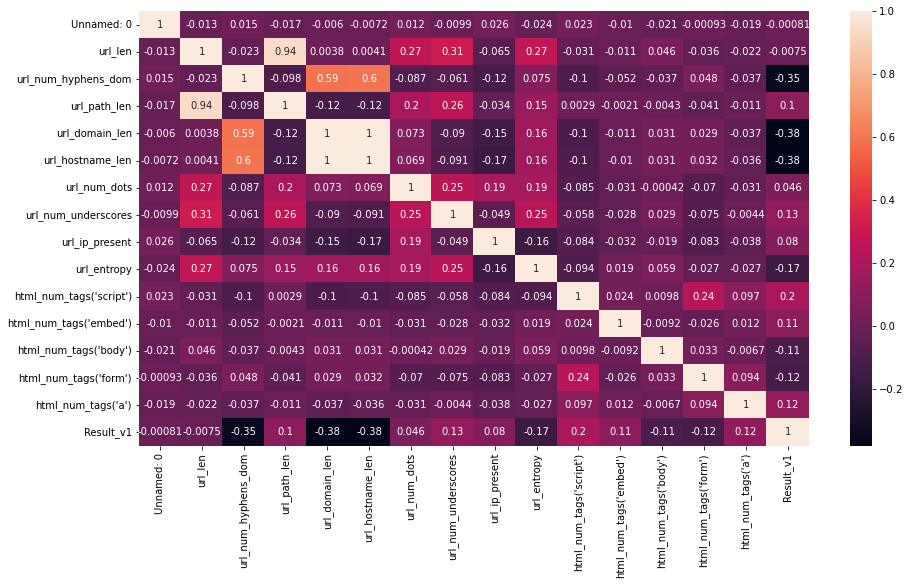

In [240]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [242]:
xx_list=['Unnamed: 0','url_len']
df = df.drop(xx_list,axis=1)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_num_hyphens_dom      3664 non-null   float64
 1   url_path_len             3664 non-null   float64
 2   url_domain_len           3664 non-null   float64
 3   url_hostname_len         3664 non-null   float64
 4   url_num_dots             3664 non-null   float64
 5   url_num_underscores      3664 non-null   float64
 6   url_ip_present           3664 non-null   float64
 7   url_entropy              3664 non-null   float64
 8   html_num_tags('script')  3664 non-null   float64
 9   html_num_tags('embed')   3664 non-null   float64
 10  html_num_tags('body')    3664 non-null   float64
 11  html_num_tags('form')    3664 non-null   float64
 12  html_num_tags('a')       3664 non-null   float64
 13  Result_v1                3664 non-null   int64  
dtypes: float64(13), int64(1)

---

## <b>Q7. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

### 모델을 학습하는 데에는 Train 데이터만 사용해야 합니다.
### 학습에 사용하지 않은 데이터를 통해 모델을 평가해야 합니다.
### 그러기 위해 Train / Test 데이터로 분리합니다.


**<span style="color:green">[참고링크] 공식 Document**</span>

* train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### <span style="color:darkred">[문제5] train_test_split 함수를 사용하여 train 데이터와 test 데이터를 분리하고 각각의 shape를 확인하세요<span>

In [245]:
target = 'Result_v1'
x = df.drop(target, axis=1)
y = df.loc[:, target]

In [246]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=.3, random_state=2022)

In [247]:
train_x.shape

(2564, 13)

In [248]:
test_x.shape

(1100, 13)

In [249]:
train_y.shape

(2564,)

In [250]:
test_y.shape

(1100,)